In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from datetime import datetime
from math import ceil
import seaborn as sns
from dateutil.relativedelta import relativedelta
from sklearn.metrics import mean_squared_error
from datetime import timedelta

from math import sqrt
import holidays
import catboost as ctb

In [2]:
df = pd.read_csv('sales_transformed_with_coords_metro.csv')

In [3]:
df

,Unnamed: 0,address,year,month,store_format,brand,sales,location,latitude,longitude,district,near_metro_distance,near_metro_count
0,0,"Россия, г Москва, Внуковское п, б-р Андрея Тар...",2018,1,Discounter,Талка,NaN,"бульвар Андрея Тарковского, 1, поселение Внуко...",55.629537,37.340739,"жилой комплекс Рассказово, поселение Внуковское",0.621132,2.0
1,1,"Россия, г Москва, Внуковское п, б-р Андрея Тар...",2018,1,Discounter,Beluga,NaN,"бульвар Андрея Тарковского, 1, поселение Внуко...",55.629537,37.340739,"жилой комплекс Рассказово, поселение Внуковское",0.621132,2.0
2,2,"Россия, г Москва, Внуковское п, б-р Андрея Тар...",2018,1,Discounter,Зеленая Марка,NaN,"бульвар Андрея Тарковского, 1, поселение Внуко...",55.629537,37.340739,"жилой комплекс Рассказово, поселение Внуковское",0.621132,2.0
3,3,"Россия, г Москва, Внуковское п, б-р Андрея Тар...",2018,1,Discounter,Kremlin Award,NaN,"бульвар Андрея Тарковского, 1, поселение Внуко...",55.629537,37.340739,"жилой комплекс Рассказово, поселение Внуковское",0.621132,2.0
4,4,"Россия, г Москва, Внуковское п, б-р Андрея Тар...",2018,1,Discounter,Medoff,NaN,"бульвар Андрея Тарковского, 1, поселение Внуко...",55.629537,37.340739,"жилой комплекс Рассказово, поселение Внуковское",0.621132,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684163,3684163,"Россия, г Москва, ш Ярославское, д 69",2019,12,Discounter,Царская Чарка,1.3,"Ярославское шоссе, 69, Москва, Россия",55.867253,37.704206,"Ярославский район, Северо-Восточный администра...",2.501211,0.0
3684164,3684164,"Россия, г Москва, ш Ярославское, д 69",2019,12,Discounter,Чача,NaN,"Ярославское шоссе, 69, Москва, Россия",55.867253,37.704206,"Ярославский район, Северо-Восточный администра...",2.501211,0.0
3684165,3684165,"Россия, г Москва, ш Ярославское, д 69",2019,12,Discounter,Чистые Росы,NaN,"Ярославское шоссе, 69, Москва, Россия",55.867253,37.704206,"Ярославский район, Северо-Восточный администра...",2.501211,0.0
3684166,3684166,"Россия, г Москва, ш Ярославское, д 69",2019,12,Discounter,Эталон,NaN,"Ярославское шоссе, 69, Москва, Россия",55.867253,37.704206,"Ярославский район, Северо-Восточный администра...",2.501211,0.0


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
len(df['store_format'].unique()),\
len(df['address'].unique()),\
len(df['brand'].unique()),\
len(df['district'].unique())

(5, 2356, 277, 395)

In [ ]:
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}}, minimal=True)
profile.to_notebook_iframe()

<hr>
<hr>
<hr>


### Plotting per shop sales


In [6]:
# add col with a date
df['date'] = df.apply(lambda x: datetime(int(x['year']), int(x['month']), 1), axis=1)

grouped_by_address = pd.DataFrame(df.groupby(['address', 'date'])['sales'].sum().reset_index())

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 10
id_per_graph = 72
count = 20
for i in range(5):
    for j in range(2):
        sns.pointplot(
            x='date', 
            y='sales', 
            hue='address', 
            data=grouped_by_address.loc[(grouped_by_address.index >= count*id_per_graph) & (grouped_by_address.index < (count+1)*id_per_graph)],
            ax=axes[i][j],
        )
        count += 1

### Plotting per brand sales

In [7]:
grouped_by_brand = pd.DataFrame(df.groupby(['brand', 'date'])['sales'].sum().reset_index())

In [ ]:
grouped_by_brand.tail()

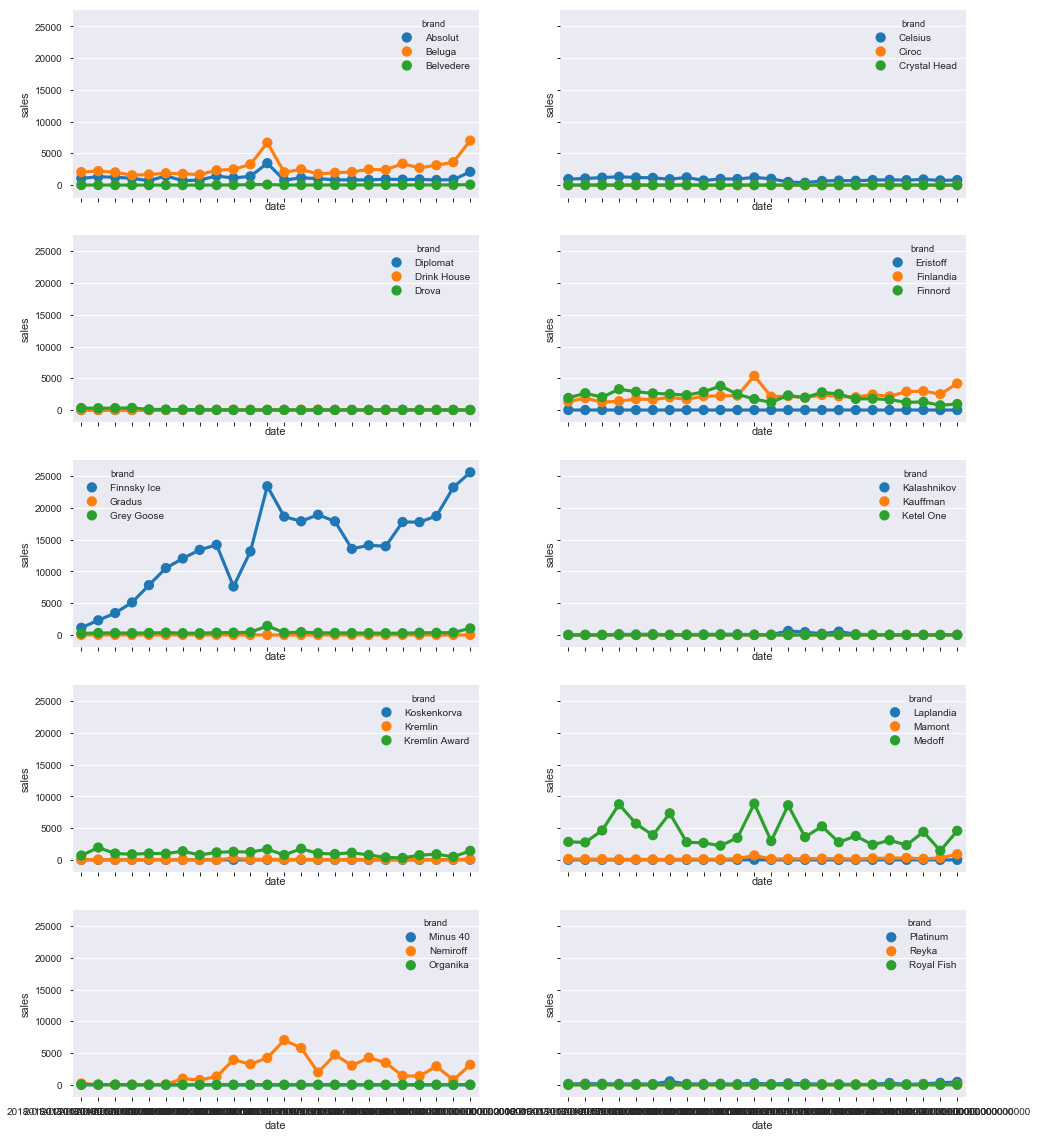

In [19]:
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 10
id_per_graph = 72
count = 0
for i in range(5):
    for j in range(2):
        sns.pointplot(
            x='date', 
            y='sales', 
            hue='brand', 
            data=grouped_by_brand.loc[(grouped_by_brand.index >= count*id_per_graph) & (grouped_by_brand.index < (count+1)*id_per_graph)],
            ax=axes[i][j],
        )
        count += 1

### Сhecking outliers

In [ ]:
plt.figure(figsize=(10,4))
plt.xlim(df['sales'].min(), df['sales'].max())
sns.boxplot(x=df['sales'])

## Data preparation

In [7]:
# check fully empty uninformative rows by address
df_address_sum = df.groupby(['address'])['sales'].sum().reset_index()
# df_address_sum[df_address_sum['sales'] <= 0]
df_address_sum.sort_values(by=['sales'])

,address,sales
1798,"Россия, г Москва, ул Свободы, д 91/1",0.2
2293,"Россия, г Москва, ш Перовское, д 10/1",0.4
1765,"Россия, г Москва, ул Руставели, д 6/6",1.6
602,"Россия, г Москва, ул Авиамоторная, д 6/4",3.4
2011,"Россия, г Москва, ул Фестивальная, д 27",9.3
...,...,...
1766,"Россия, г Москва, ул Рябиновая, д 59",28081.5
350,"Россия, г Москва, пр-кт Мира, д 211/1",32749.1
986,"Россия, г Москва, ул Дорожная, д 1/1",34177.1
150,"Россия, г Москва, км МКАД 104-й, д 6",35484.2


In [8]:
# delete fully empty uninformative rows by brand
df_brand_sum = df.groupby(['brand'])['sales'].sum().reset_index()
useless_brands = df_brand_sum[df_brand_sum['sales'] <= 0]['brand'].tolist()
len(useless_brands)
df = df.drop(df['brand'].isin(useless_brands).index)

1

In [9]:
# drop Nan columns
df = df.dropna(subset=['sales', 'district'])

## Lag Features

#### Lag features for store sales

In [10]:
month_revenues = df.groupby(['address', 'date']).agg({'sales': ['sum', 'mean', 'std']}).reset_index()
month_revenues.columns = ['address', 'date', 'sales_sum', 'sales_mean', 'sales_std']

In [11]:
month_revenues['lag_1_store_sales_sum'] =  month_revenues.groupby('address')['sales_sum'].shift(1)
month_revenues['lag_1_store_sales_mean'] =  month_revenues.groupby('address')['sales_mean'].shift(1)
month_revenues['lag_1_store_sales_std'] =  month_revenues.groupby('address')['sales_std'].shift(1)

month_revenues['lag_2_store_sales_sum'] =  month_revenues.groupby('address')['sales_sum'].shift(2)
month_revenues['lag_2_store_sales_mean'] =  month_revenues.groupby('address')['sales_mean'].shift(2)
month_revenues['lag_2_store_sales_std'] =  month_revenues.groupby('address')['sales_std'].shift(2)

month_revenues['lag_3_store_sales_sum'] =  month_revenues.groupby('address')['sales_sum'].shift(3)
month_revenues['lag_3_store_sales_mean'] =  month_revenues.groupby('address')['sales_mean'].shift(3)
month_revenues['lag_3_store_sales_std'] =  month_revenues.groupby('address')['sales_std'].shift(3)

In [12]:
month_revenues.tail(27)

,address,date,sales_sum,sales_mean,sales_std,lag_1_store_sales_sum,lag_1_store_sales_mean,lag_1_store_sales_std,lag_2_store_sales_sum,lag_2_store_sales_mean,lag_2_store_sales_std,lag_3_store_sales_sum,lag_3_store_sales_mean,lag_3_store_sales_std
46327,"Россия, г Москва, ш Ярославское, д 63",2019-08-01,53.7,1.167391,1.959371,48.9,1.086667,1.969379,42.4,1.009524,1.763009,49.9,1.247500,2.035831
46328,"Россия, г Москва, ш Ярославское, д 63",2019-09-01,49.8,1.185714,1.489078,53.7,1.167391,1.959371,48.9,1.086667,1.969379,42.4,1.009524,1.763009
46329,"Россия, г Москва, ш Ярославское, д 63",2019-10-01,46.5,1.107143,1.497542,49.8,1.185714,1.489078,53.7,1.167391,1.959371,48.9,1.086667,1.969379
46330,"Россия, г Москва, ш Ярославское, д 69",2018-01-01,249.6,4.457143,6.810950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46331,"Россия, г Москва, ш Ярославское, д 69",2018-02-01,248.4,4.776923,6.003157,249.6,4.457143,6.810950,NaN,NaN,NaN,NaN,NaN,NaN
46332,"Россия, г Москва, ш Ярославское, д 69",2018-03-01,251.7,4.840385,6.124629,248.4,4.776923,6.003157,249.6,4.457143,6.810950,NaN,NaN,NaN
46333,"Россия, г Москва, ш Ярославское, д 69",2018-04-01,236.3,4.375926,5.723369,251.7,4.840385,6.124629,248.4,4.776923,6.003157,249.6,4.457143,6.810950
46334,"Россия, г Москва, ш Ярославское, д 69",2018-05-01,223.6,4.065455,5.298750,236.3,4.375926,5.723369,251.7,4.840385,6.124629,248.4,4.776923,6.003157
46335,"Россия, г Москва, ш Ярославское, д 69",2018-06-01,218.1,3.894643,5.327541,223.6,4.065455,5.298750,236.3,4.375926,5.723369,251.7,4.840385,6.124629
46336,"Россия, г Москва, ш Ярославское, д 69",2018-07-01,208.8,3.728571,4.743099,218.1,3.894643,5.327541,223.6,4.065455,5.298750,236.3,4.375926,5.723369


In [13]:
left_df =  df.set_index(['address', 'date'])
right_df = month_revenues.set_index(['address', 'date'])
merged_df = pd.merge(left_df, right_df, left_index=True, right_index=True, how='left', sort=False) # todo: change to df

In [14]:
merged_df.loc['Россия, г Москва, Внуковское п, б-р Андрея Тарковского, д 1'].tail(27)

,year,month,store_format,brand,sales,location,latitude,longitude,district,near_metro_distance,...,sales_std,lag_1_store_sales_sum,lag_1_store_sales_mean,lag_1_store_sales_std,lag_2_store_sales_sum,lag_2_store_sales_mean,lag_2_store_sales_std,lag_3_store_sales_sum,lag_3_store_sales_mean,lag_3_store_sales_std
date,,,,,,,,,,,,,,,,,,,,,
2019-12-01,2019,12,Discounter,Парламент,0.7,"бульвар Андрея Тарковского, 1, поселение Внуко...",55.629537,37.340739,"жилой комплекс Рассказово, поселение Внуковское",0.621132,...,2.234283,93.3,1.794231,2.448562,60.8,1.240816,1.675674,NaN,NaN,NaN
2019-12-01,2019,12,Discounter,Перепелка,0.4,"бульвар Андрея Тарковского, 1, поселение Внуко...",55.629537,37.340739,"жилой комплекс Рассказово, поселение Внуковское",0.621132,...,2.234283,93.3,1.794231,2.448562,60.8,1.240816,1.675674,NaN,NaN,NaN
2019-12-01,2019,12,Discounter,Праздничная,2.6,"бульвар Андрея Тарковского, 1, поселение Внуко...",55.629537,37.340739,"жилой комплекс Рассказово, поселение Внуковское",0.621132,...,2.234283,93.3,1.794231,2.448562,60.8,1.240816,1.675674,NaN,NaN,NaN
2019-12-01,2019,12,Discounter,Пьятница,0.3,"бульвар Андрея Тарковского, 1, поселение Внуко...",55.629537,37.340739,"жилой комплекс Рассказово, поселение Внуковское",0.621132,...,2.234283,93.3,1.794231,2.448562,60.8,1.240816,1.675674,NaN,NaN,NaN
2019-12-01,2019,12,Discounter,Пять Озер,5.4,"бульвар Андрея Тарковского, 1, поселение Внуко...",55.629537,37.340739,"жилой комплекс Рассказово, поселение Внуковское",0.621132,...,2.234283,93.3,1.794231,2.448562,60.8,1.240816,1.675674,NaN,NaN,NaN
2019-12-01,2019,12,Discounter,Русская,1.0,"бульвар Андрея Тарковского, 1, поселение Внуко...",55.629537,37.340739,"жилой комплекс Рассказово, поселение Внуковское",0.621132,...,2.234283,93.3,1.794231,2.448562,60.8,1.240816,1.675674,NaN,NaN,NaN
2019-12-01,2019,12,Discounter,Русская Валюта,4.5,"бульвар Андрея Тарковского, 1, поселение Внуко...",55.629537,37.340739,"жилой комплекс Рассказово, поселение Внуковское",0.621132,...,2.234283,93.3,1.794231,2.448562,60.8,1.240816,1.675674,NaN,NaN,NaN
2019-12-01,2019,12,Discounter,Русский Лед,0.8,"бульвар Андрея Тарковского, 1, поселение Внуко...",55.629537,37.340739,"жилой комплекс Рассказово, поселение Внуковское",0.621132,...,2.234283,93.3,1.794231,2.448562,60.8,1.240816,1.675674,NaN,NaN,NaN
2019-12-01,2019,12,Discounter,Русский Стандарт,1.6,"бульвар Андрея Тарковского, 1, поселение Внуко...",55.629537,37.340739,"жилой комплекс Рассказово, поселение Внуковское",0.621132,...,2.234283,93.3,1.794231,2.448562,60.8,1.240816,1.675674,NaN,NaN,NaN


#### Lag features for brand sales in each store

In [15]:
df_grouped_by_brand = df.groupby(['address', 'brand', 'date']).agg({'sales':'sum'}).reset_index()

In [16]:
df_grouped_by_brand['lag_1_brand_sales'] = df_grouped_by_brand.groupby(['address', 'brand'])['sales'].shift(1)
df_grouped_by_brand['lag_2_brand_sales'] = df_grouped_by_brand.groupby(['address', 'brand'])['sales'].shift(2)
df_grouped_by_brand['lag_3_brand_sales'] = df_grouped_by_brand.groupby(['address', 'brand'])['sales'].shift(3)

In [17]:
df_grouped_by_brand[df_grouped_by_brand['brand'] == 'Царская Чарка'].tail(21)

,address,brand,date,sales,lag_1_brand_sales,lag_2_brand_sales,lag_3_brand_sales
2097365,"Россия, г Москва, ш Ярославское, д 142/1",Царская Чарка,2019-12-01,1.7,0.5,0.4,0.5
2102160,"Россия, г Москва, ш Ярославское, д 6",Царская Чарка,2019-03-01,0.7,NaN,NaN,NaN
2102161,"Россия, г Москва, ш Ярославское, д 6",Царская Чарка,2019-04-01,2.0,0.7,NaN,NaN
2102162,"Россия, г Москва, ш Ярославское, д 6",Царская Чарка,2019-05-01,2.5,2.0,0.7,NaN
2102163,"Россия, г Москва, ш Ярославское, д 6",Царская Чарка,2019-06-01,2.4,2.5,2.0,0.7
2102164,"Россия, г Москва, ш Ярославское, д 6",Царская Чарка,2019-07-01,1.5,2.4,2.5,2.0
2102165,"Россия, г Москва, ш Ярославское, д 6",Царская Чарка,2019-08-01,2.3,1.5,2.4,2.5
2102166,"Россия, г Москва, ш Ярославское, д 6",Царская Чарка,2019-09-01,1.9,2.3,1.5,2.4
2102167,"Россия, г Москва, ш Ярославское, д 6",Царская Чарка,2019-10-01,1.4,1.9,2.3,1.5
2102168,"Россия, г Москва, ш Ярославское, д 6",Царская Чарка,2019-11-01,1.2,1.4,1.9,2.3


In [18]:
merged_df = merged_df.reset_index()
left_df =  merged_df.set_index(['address', 'brand', 'date'])
right_df = df_grouped_by_brand.drop('sales', axis=1).set_index(['address', 'brand', 'date'])
df = pd.merge(left_df, right_df, left_index=True, right_index=True, how='left', sort=False).reset_index()

In [19]:
df.loc[(df['address'] == 'Россия, г Москва, ш Ярославское, д 69') & (df['brand'] == 'Царская Чарка')].tail(21)

,address,brand,date,year,month,store_format,sales,location,latitude,longitude,...,lag_1_store_sales_std,lag_2_store_sales_sum,lag_2_store_sales_mean,lag_2_store_sales_std,lag_3_store_sales_sum,lag_3_store_sales_mean,lag_3_store_sales_std,lag_1_brand_sales,lag_2_brand_sales,lag_3_brand_sales
2111298,"Россия, г Москва, ш Ярославское, д 69",Царская Чарка,2019-03-01,2019,3,Discounter,0.5,"Ярославское шоссе, 69, Москва, Россия",55.867253,37.704206,...,5.195605,196.0,3.379310,5.417896,237.1,4.473585,6.683940,NaN,NaN,NaN
2111299,"Россия, г Москва, ш Ярославское, д 69",Царская Чарка,2019-04-01,2019,4,Discounter,0.9,"Ярославское шоссе, 69, Москва, Россия",55.867253,37.704206,...,5.977545,205.5,3.951923,5.195605,196.0,3.379310,5.417896,0.5,NaN,NaN
2111300,"Россия, г Москва, ш Ярославское, д 69",Царская Чарка,2019-05-01,2019,5,Discounter,0.3,"Ярославское шоссе, 69, Москва, Россия",55.867253,37.704206,...,4.989844,204.7,3.790741,5.977545,205.5,3.951923,5.195605,0.9,0.5,NaN
2111301,"Россия, г Москва, ш Ярославское, д 69",Царская Чарка,2019-06-01,2019,6,Discounter,0.3,"Ярославское шоссе, 69, Москва, Россия",55.867253,37.704206,...,4.825851,185.2,3.367273,4.989844,204.7,3.790741,5.977545,0.3,0.9,0.5
2111302,"Россия, г Москва, ш Ярославское, д 69",Царская Чарка,2019-07-01,2019,7,Discounter,0.5,"Ярославское шоссе, 69, Москва, Россия",55.867253,37.704206,...,4.211850,170.0,3.469388,4.825851,185.2,3.367273,4.989844,0.3,0.3,0.9
2111303,"Россия, г Москва, ш Ярославское, д 69",Царская Чарка,2019-08-01,2019,8,Discounter,0.1,"Ярославское шоссе, 69, Москва, Россия",55.867253,37.704206,...,4.711597,158.9,3.310417,4.211850,170.0,3.469388,4.825851,0.5,0.3,0.3
2111304,"Россия, г Москва, ш Ярославское, д 69",Царская Чарка,2019-09-01,2019,9,Discounter,0.2,"Ярославское шоссе, 69, Москва, Россия",55.867253,37.704206,...,4.814099,170.5,3.552083,4.711597,158.9,3.310417,4.211850,0.1,0.5,0.3
2111305,"Россия, г Москва, ш Ярославское, д 69",Царская Чарка,2019-10-01,2019,10,Discounter,0.2,"Ярославское шоссе, 69, Москва, Россия",55.867253,37.704206,...,5.599745,177.4,3.411538,4.814099,170.5,3.552083,4.711597,0.2,0.1,0.5
2111306,"Россия, г Москва, ш Ярославское, д 69",Царская Чарка,2019-11-01,2019,11,Discounter,0.5,"Ярославское шоссе, 69, Москва, Россия",55.867253,37.704206,...,4.986203,187.1,3.530189,5.599745,177.4,3.411538,4.814099,0.2,0.2,0.1
2111307,"Россия, г Москва, ш Ярославское, д 69",Царская Чарка,2019-12-01,2019,12,Discounter,1.3,"Ярославское шоссе, 69, Москва, Россия",55.867253,37.704206,...,6.493904,192.5,3.632075,4.986203,187.1,3.530189,5.599745,0.5,0.2,0.2


### Month days, holidays count

In [20]:
days = pd.Series([0, 31,28,31,30,31,30,31,31,30,31,30,31])
df['days'] = df['month'].map(days).astype(np.int64)
df['days'] = df['days'].astype(np.int64)

In [21]:
df['days'].unique()

array([31, 30, 28])

In [22]:
ru_holidays = holidays.Russia()

In [23]:
def get_holidays_count(month_start):
    month_start = pd.to_datetime(month_start)
    month_end = month_start + relativedelta(months=1)
    return len(ru_holidays[month_start:month_end])

In [24]:
df['holidays_cnt'] = df['date'].apply(get_holidays_count).astype(np.int64)

Dropping useless columns

In [25]:
df = df.drop(['location'], axis=1)

In [ ]:
df.head()